In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.random.seed(21)
# random.seed(21)

In [3]:
#K-means
def intial_mu_k(k,X):
    return np.random.randint(low = 0,high = X.shape[0],size = k)

def cost_function(mu,cluster_id,X):
    cost = 0
    for i in range(X.shape[0]):
        cost += np.sum((mu[cluster_id[i]]-X[i])**2)
    return cost

def K_means(k,X,max_iters = 100):
    mu_index = intial_mu_k(k,X)
    cluster_id = np.zeros(X.shape[0],dtype=int)
    
    num_iters = 0
    error = 1000
    cost_values = []
    
    for i in range(k):
        if X.shape[0] == X.size:
            mu_data = np.zeros(k)
            mu_data[i] = X[mu_index[i]]
            
        else:    
            mu_data = np.zeros((k,2))
        
            for j in range(X.shape[1]):
                mu_data[i][j] = X[mu_index[i]][j]
            
    while (num_iters < max_iters) and (error > 0.0000001):
        
#   Updating Cluster_ids
        for i in range(X.shape[0]):
            if X.shape[0] == X.size:
                distances = (mu_data-X[i])**2

            else:   
                distances = np.sum((mu_data-X[i])**2,axis = 1)
                
            min_dist = np.amin(distances)
            index = -1
            for j in range(mu_data.shape[0]):
                if distances[j] == min_dist:
                    index = j
                    break
            cluster_id[i] = index
            

# Update mu's
        if X.shape[0] == X.size:
           new_mu_data = np.zeros(k)
            
        else:    
            new_mu_data = np.zeros((k,X.shape[1]))
    
        cluster_size = np.zeros(k)
        for i in range(X.shape[0]):
            cluster_size[cluster_id[i]] = cluster_size[cluster_id[i]]+1
            new_mu_data[cluster_id[i]] = new_mu_data[cluster_id[i]]+X[i]
        
        for i in range(k):
            if cluster_size[i] == 0:
                cluster_size[i] = 1
                
            new_mu_data[i] = new_mu_data[i]/cluster_size[i]
        
        J = cost_function(mu_data,cluster_id,X)
        cost_values.append(J)
        error = np.sum(np.abs(mu_data-new_mu_data))
        mu_data = new_mu_data
        num_iters += 1
        print("iteration",num_iters)
        print("error:",error)
        print("cost:",J)
        
    return mu_data,cluster_id,cost_values,num_iters

In [4]:
mi = []
si = []
k = 3
y = np.array([])
for i in range(k):
    
    mean = (2*i)**2+np.random.rand()
    mi.append(mean)
    mat = (np.random.rand())*5
    si.append(mat)
    s = np.random.normal(mean, mat, 10000)
    y = np.concatenate([y,s],axis=0)

In [5]:
mu,cluster_id,cost,num_iters = K_means(k,y)

iteration 1
error: 4.588888076770301
cost: 675452.20505461
iteration 2
error: 4.880983246563263
cost: 340887.1039585642
iteration 3
error: 1.8144704529220526
cost: 231237.1810904888
iteration 4
error: 1.507439412418139
cost: 208665.52642988772
iteration 5
error: 1.3017035601869906
cost: 192936.03131981794
iteration 6
error: 1.0511398336705522
cost: 181610.3174302055
iteration 7
error: 0.8382296991806215
cost: 174561.94148310673
iteration 8
error: 0.6609707124803024
cost: 170319.0296176835
iteration 9
error: 0.497700391858124
cost: 167820.89891013625
iteration 10
error: 0.35335533369706595
cost: 166430.29554762636
iteration 11
error: 0.275370266676144
cost: 165710.6889205042
iteration 12
error: 0.1886418466842155
cost: 165301.7235130508
iteration 13
error: 0.13426381897817366
cost: 165107.61845524106
iteration 14
error: 0.09992900296493445
cost: 165001.33212564373
iteration 15
error: 0.08245101257338418
cost: 164941.29622423448
iteration 16
error: 0.05735567750640744
cost: 164903.939759

Text(0.5, 1.0, 'Cost Function')

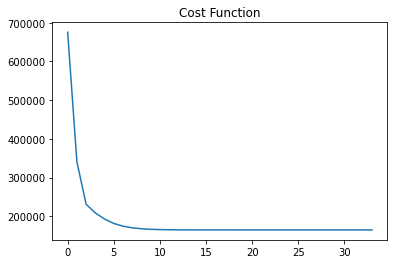

In [6]:
x = []
for i in range(num_iters):
    x.append(i)
plt.plot(x,cost)
plt.title("Cost Function")

In [7]:
# GMM-2
# let mu , cluster_ids, cluster_sizes are returned from kmeans
# data is input data
# k is number of gaussians in mixture

def compute(X,weights,means,sigma,k):
    temp = np.zeros((X.shape[0],k))
    
    for i in range(k):
        p = weights[i]
        liklihood = multivariate_normal.pdf(X,means[i],sigma[i])
        temp[:,i] = p*liklihood
        
    likihod = np.sum(temp,axis = 1)
    log_likihod = np.log(likihod)
        
    return np.sum(log_likihod)

def EM(data,mu,cluster_ids,cluster_size,k,maxiters = 1000):
# 1) Initilization

    means = []
    sigma = []
    weights = []
    cluster = []
    gamma = np.zeros((data.shape[0],k))
    
    for i in range(k):
        means.append(mu[i])
        cluster.append([])

    for i in range(data.shape[0]):
        cluster[cluster_id[i]].append(data[i])


    for i in range(k):
        delta = np.asarray(cluster[i])-means[i]
        sigma.append(np.dot(delta.T,delta)/cluster_size[i])
        weights.append(cluster_size[i]/data.shape[0])
    
# ----------FINE_1


# 2) 
    cost = []
    num_clusters = k
    
    likli = compute(data,weights,means,sigma,k)
    cost.append(likli)
    num_iters = 0
    error = 10.0
    N = data.shape[0]
    
    
    while num_iters < maxiters and error > 2 : 
        
        for i in range(N):
            for j in range(num_clusters):
                gamma[i,j] = weights[j]*multivariate_normal.pdf(data[i],means[j],sigma[j])
        r_sum = gamma.sum(axis=1)[:,np.newaxis]
        gamma = gamma/r_sum


### M_step: M-step in EM Algorithm
        count = np.sum(gamma,axis=0)
        for i in range(num_clusters):
# print(type(weights),type(count))
    
            weights[i] = count[i]/N
    
            w_sum = 0
            for j in range(N):
                w_sum += (gamma[j,i]*data[j])
            means[i] = w_sum/count[i]
        
        
            w_sum = 0
            for j in range(N):
                w_sum += (gamma[j,i]* np.outer(data[j]-means[i],data[j]-means[i]))
            sigma[i] = w_sum/count[i]
            
        latest_likilhood = compute(data,weights,means,sigma,k)
        error = np.abs(latest_likilhood-likli)
        likli = latest_likilhood
        cost.append(likli)
        print(error)
        print(means)
        print(sigma)
        print(weights)
        
    return means,sigma,weights,cost
            

In [8]:
cluster_size = np.zeros(k)

for i in range(y.shape[0]):
    cluster_size[cluster_id[i]] += 1
    
means,sigma,weights,cost = EM(y,mu,cluster_id,cluster_size,k)

297.64639144622197
[8.030480157180554, 0.19791013322844084, 16.7104248356304]
[array([[7.78915925]]), array([[4.66098446]]), array([[8.10922875]])]
[0.18198137403742254, 0.5012004224131058, 0.3168182035494604]
59.75650617686915
[7.978133503577907, 0.2352341088896704, 16.616536978452256]
[array([[8.52211351]]), array([[4.85779562]]), array([[8.60985999]])]
[0.17592212702582968, 0.5031402873228513, 0.32093758565131447]
18.961138012862648
[7.929668851762711, 0.25327901667380753, 16.558675784656273]
[array([[8.92868894]]), array([[4.95534918]]), array([[8.90746078]])]
[0.17243108435797252, 0.5038828338042849, 0.3236860818377351]
7.774784444642137
[7.883732124384298, 0.26198014307887385, 16.51880897188288]
[array([[9.15988286]]), array([[5.00580185]]), array([[9.10329555]])]
[0.17021142513896506, 0.5040505186618117, 0.32573805619921725]
3.9483497821347555
[7.839967703457863, 0.26566623318891075, 16.489197651383314]
[array([[9.28705071]]), array([[5.03111338]]), array([[9.24118492]])]
[0.168

In [85]:
from sklearn import mixture
g = mixture.GaussianMixture(n_components=3)
g.fit(y.reshape(-1,1))
g.means_

array([[ 0.2668047 ],
       [16.53279287],
       [ 7.92603487]])

In [86]:
means

[7.758754004515185, 0.26576393962431266, 16.446636073609067]

In [87]:
g.score(y.reshape(-1,1))*3000

-9610.929419210861

In [88]:
cost

[-96491.72423177623,
 -96194.07784033,
 -96134.32133415314,
 -96115.36019614027,
 -96107.58541169563,
 -96103.6370619135,
 -96101.19674916082,
 -96099.42609800951]

In [ ]:
mi